In [23]:
!mq ls -C

FAILED: 12, done: 11, TIMEOUT: 3, CANCELED: 1, MEMORY: 1, queued: 1, total: 29


In [19]:
from ase.io import read
from gpaw import GPAW, PW, FermiDirac
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20 

In [24]:
# Function for reading in Data for Convergence Tests
out_dir = './out/'

def csv_name(formula, param_name, file_prefix):
    return out_dir + file_prefix + param_name + '_' + formula + '_energies.csv'

def read_convergence_energies(formula, param_name, param_values, file_prefix='', reload = False):
    if reload:
        print('Loading energies from gpaw')
        E = np.zeros(len(param_values))
        for i, param_val in enumerate(param_values):
            name=file_prefix + param_name + '=' + str(param_val) + '_' + formula + '_gs_out'
            calc = GPAW(out_dir + name + '.gpw', txt=None)
            atoms = calc.get_atoms()
            E[i] = atoms.get_potential_energy()
        df = pd.DataFrame({param_name: param_values, 'E': E})
        df.to_csv(csv_name(formula, param_name, file_prefix))
    else:
        print('Reading cached energies')
        print(file_prefix)
        df = pd.read_csv(csv_name(formula, param_name, file_prefix))
        E = df['E']
    return E

**BN Convergence - ecut**

In [25]:
formula = 'BN'
ecuts_BN = np.arange(100, 1100, 100)
E_ecut_BN = read_convergence_energies(formula, 'ecut', ecuts_BN)

Reading cached energies



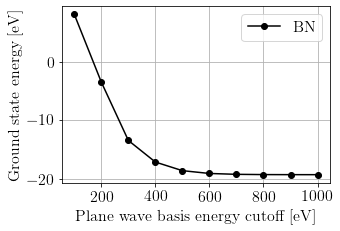

In [26]:
plt.figure(figsize=(5,3.5))
plt.plot(ecuts_BN, E_ecut_BN, 'ko-', label='$\mathrm{BN}$')
# plt.title('BN Ground State Convergence Test')
plt.ylabel(r'Ground state energy [eV]')
plt.xlabel(r'Plane wave basis energy cutoff [eV]')
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('./plots/ecut_' + formula + '_gs_convergence.pdf')
plt.savefig('./plots/ecut_' + formula + '_gs_convergence.png')
plt.show()

**WSe2 Convergence - ecut**

In [27]:
formula = 'WSe2'
ecuts_WSe2 = np.arange(100, 1100, 100)
E_ecut_WSe2 = read_convergence_energies(formula, 'ecut', ecuts_WSe2)

Reading cached energies



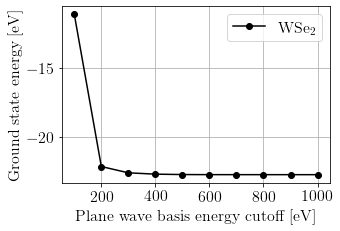

In [28]:
plt.figure(figsize=(5,3.5))
plt.plot(ecuts_WSe2, E_ecut_WSe2, 'ko-', label='$\mathrm{WSe_2}$')
# plt.title(r'$\mathrm{WSe_2}$ Ground State Convergence Test')
plt.ylabel(r'Ground state energy [eV]')
plt.xlabel(r'Plane wave basis energy cutoff [eV]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('./plots/ecut_' + formula + '_gs_convergence.pdf')
plt.savefig('./plots/ecut_' + formula + '_gs_convergence.png')
plt.show()

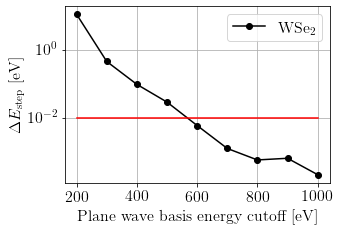

In [29]:
plt.figure(figsize=(5,3.5))
plt.semilogy(ecuts_WSe2[1:], -np.diff(E_ecut_WSe2)[:], 'ko-', label='$\mathrm{WSe_2}$')
plt.plot(ecuts_WSe2[1:],np.ones(len(ecuts_WSe2[1:]))*10**(-2),'r')
# plt.title(r'$\mathrm{WSe_2}$ Ground State Convergence Test')
plt.ylabel(r'$\Delta E_\mathrm{step}$ [eV]')
plt.xlabel(r'Plane wave basis energy cutoff [eV]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('./plots/ecut_' + formula + '_gs_convergence.pdf')
plt.savefig('./plots/ecut_' + formula + '_gs_convergence.png')
plt.show()

### Combined Convergence for BN and WSe2

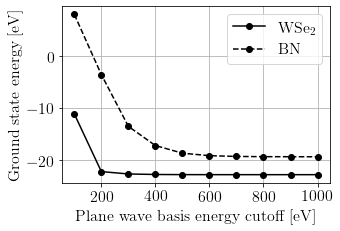

In [30]:
plt.figure(figsize=(5,3.5))
plt.plot(ecuts_WSe2, E_ecut_WSe2, 'ko-', label='$\mathrm{WSe_2}$')
plt.plot(ecuts_BN, E_ecut_BN, 'ko--', label='$\mathrm{BN}$')
# plt.title(r'$\mathrm{WSe_2}$ Ground State Convergence Test')
plt.ylabel(r'Ground state energy [eV]')
plt.xlabel(r'Plane wave basis energy cutoff [eV]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('./plots/ecut_BN_and_WSe2_gs_convergence.pdf')
plt.savefig('./plots/ecut_BN_and_WSe2_gs_convergence.png')
plt.show()

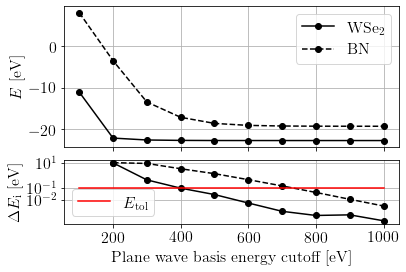

In [42]:
ax1 = plt.subplot(3,1,(1,2))
plt.tick_params('x', labelbottom=False)
plt.plot(ecuts_WSe2, E_ecut_WSe2, 'ko-', label='$\mathrm{WSe_2}$')
plt.plot(ecuts_BN, E_ecut_BN, 'ko--', label='$\mathrm{BN}$')
plt.ylabel(r'$E$ [eV]')
plt.legend()
plt.grid()

# Plot change in energy
E_tol = 10**(-1)
ax2 = plt.subplot(3,1,3, sharex=ax1)
plt.semilogy(ecuts_WSe2[1:], -np.diff(E_ecut_WSe2)[:], 'ko-')
plt.semilogy(ecuts_BN[1:], -np.diff(E_ecut_BN), 'ko--')
plt.plot(ecuts_WSe2,np.ones(len(ecuts_WSe2))*E_tol,'r', label='$E_\mathrm{tol}$')
plt.ylabel(r'$\Delta E_\mathrm{i}$ [eV]')
plt.yticks([10**(-2),E_tol,10])
plt.tick_params('x')

plt.xlabel(r'Plane wave basis energy cutoff [eV]')
plt.legend()
plt.grid()

**WSe2 ecut for different Functionals**

In [11]:
formula = 'WSe2'
ecuts_WSe2_PBE = np.arange(100, 1100, 100)
E_ecut_WSe2_PBE = read_convergence_energies(formula, 'ecut', ecuts_WSe2, file_prefix='xc=PBE_', reload=True)

Loading energies from gpaw


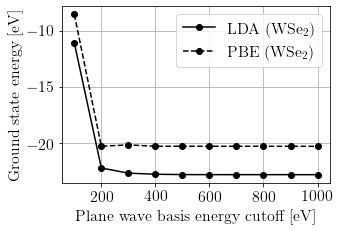

In [12]:
plt.figure(figsize=(5,3.5))
plt.plot(ecuts_WSe2, E_ecut_WSe2, 'ko-', label='LDA $(\mathrm{WSe_2})$')
plt.plot(ecuts_WSe2, E_ecut_WSe2_PBE, 'ko--', label='PBE $(\mathrm{WSe_2})$')
# plt.title(r'$\mathrm{WSe_2}$ Ground State Convergence Test')
plt.ylabel(r'Ground state energy [eV]')
plt.xlabel(r'Plane wave basis energy cutoff [eV]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('./plots/xc_ecut_WSe2_gs_convergence.pdf')
plt.savefig('./plots/xc_ecut_WSe2_gs_convergence.png')
plt.show()

In [13]:
E_ecut_WSe2_PBE

array([ -8.55339617, -20.24520553, -20.12234407, -20.24520553,
       -20.24058772, -20.24520553, -20.24613584, -20.24520553,
       -20.24735125, -20.24520553])

**WSe2 Convergence - no_kpts**

In [134]:
formula = 'WSe2'
no_kptss_WSe2 = np.hstack((np.arange(1,5,1), np.arange(5,85,5)))
E_k_WSe2 = read_convergence_energies(formula, 'no_kpts', no_kptss_WSe2)

Loading energies from gpaw


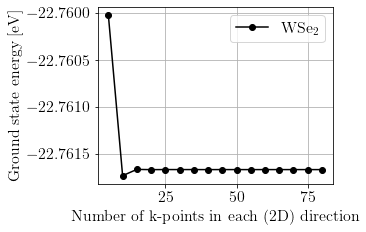

In [135]:
plt.figure(figsize=(5,3.5))
plt.plot(np.array(no_kptss_WSe2), E_k_WSe2, 'ko-', label='$\mathrm{WSe_2}$')
# plt.title(r'$\mathrm{WSe_2}$ Ground State Convergence Test')
plt.ylabel(r'Ground state energy [eV]')
plt.xlabel(r'Number of k-points in each (2D) direction')
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('./plots/no_kpts_' + formula + '_gs_convergence.pdf')
plt.savefig('./plots/no_kpts_' + formula + '_gs_convergence.png')
plt.show()

**WSe2 Convergence - Vacuum**

In [106]:
formula = 'WSe2'
vacs_WSe2 = np.arange(1,11,1)
E_vac_WSe2 = read_convergence_energies(formula, 'vac', vacs_WSe2)

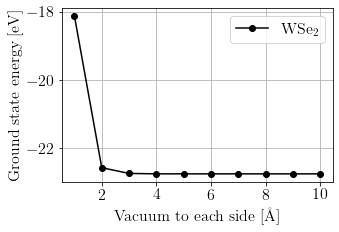

In [107]:
plt.figure(figsize=(5,3.5))
plt.plot(np.array(vacs_WSe2), E_vac_WSe2, 'ko-', label='$\mathrm{WSe_2}$')
# plt.title('$\mathrm{WSe_2}$ Ground State Convergence Test')
plt.ylabel(r'Ground state energy [eV]')
plt.xlabel(r'Vacuum to each side [Å]')
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('./plots/vac_' + formula + '_gs_convergence.pdf')
plt.savefig('./plots/vac_' + formula + '_gs_convergence.png')
plt.show()

In [108]:
# xcs = ['LDA', 'PBE', 'RPBE']
# E_xc = np.zeros(len(xcs))

# for i, xc in enumerate(xcs):
#     name='xc=' + str(xc) + '_' + formula + '_gs_out'
#     calc = GPAW(name + '.gpw', txt=None)
#     atoms = calc.get_atoms()
#     E_vac[i] = atoms.get_potential_energy()

# plt.bar(np.array(xcs), E_xc, 'ko-')
# plt.ylabel(r'Ground state energy [eV]')
# plt.xlabel(r'Excange correllation functional')
# plt.grid()
# plt.savefig('./plots/xc_gs_convergence.pdf')
# plt.show()